# Training a PPO Agent on CartPole-v1
This notebook trains a Proximal Policy Optimization (PPO) agent using Stable-Baselines3 to solve the CartPole-v1 environment. The code includes:
- Custom neural network architecture and activation functions.
- Reward curve plotting using training logs.
- Rendering the trained agent.
- install dependencies: pip install stable-baselines3[extra] gymnasium[classic-control]
- packages version: stable-baselines3-2.4.0 torch-2.5.1 gymnasium-1.0.0

In [7]:
!pip install gymnasium[classic-control] stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.8 MB/s eta 0:00:00


In [8]:
import os
import gymnasium as gym
from torch import nn
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from IPython.display import clear_output
import matplotlib.pyplot as plt

## 1. Set Up the Logging Directory
Ensure the directory exists to save training logs for plotting.

In [9]:
# Directory to save logs
LOG_DIR = "./ppo_cartpole_logs"
os.makedirs(LOG_DIR, exist_ok=True)  # Create the directory if it doesn't exist

## 2. Train the PPO Agent
Define the environment and training process for the PPO agent, including:
- Custom network architecture.
- Training for 50,000 timesteps.

In [10]:
def train_cartpole():
    # Custom policy parameters
    policy_kwargs = dict(
        net_arch=dict(pi=[128], vf=[128]),  # Two hidden layers with 128 units each
        activation_fn=nn.ReLU  # Use ReLU activation function
    )

    # Step 1: Create the environment with monitoring
    env = Monitor(gym.make("CartPole-v1"), LOG_DIR)  # Monitor logs rewards and other stats

    # Step 2: Initialize the PPO model
    model = PPO(
        policy="MlpPolicy",  # Use a multilayer perceptron policy
        env=env,
        policy_kwargs=policy_kwargs,
        learning_rate=0.01,  # Learning rate
        gamma=0.99,  # Discount factor
        verbose=1,  # Display training logs
    )

    # Display the policy network structure
    # print(model.policy)

    # Step 3: Train the model
    print("Training PPO agent...")
    model.learn(total_timesteps=50000)  # Total training timesteps

    # Step 4: Save the trained model
    model.save("ppo_cartpole")
    print("Model saved as 'ppo_cartpole'.")

    return model

# Train the PPO agent
trained_model = train_cartpole()

Using cpu device
Wrapping the env in a DummyVecEnv.
Training PPO agent...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | 20.6     |
| time/              |          |
|    fps             | 1249     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.6        |
|    ep_rew_mean          | 30.6        |
| time/                   |             |
|    fps                  | 946         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014153811 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       

## 3. Plot Rewards Curve
Use training logs to plot the rewards curve over timesteps.

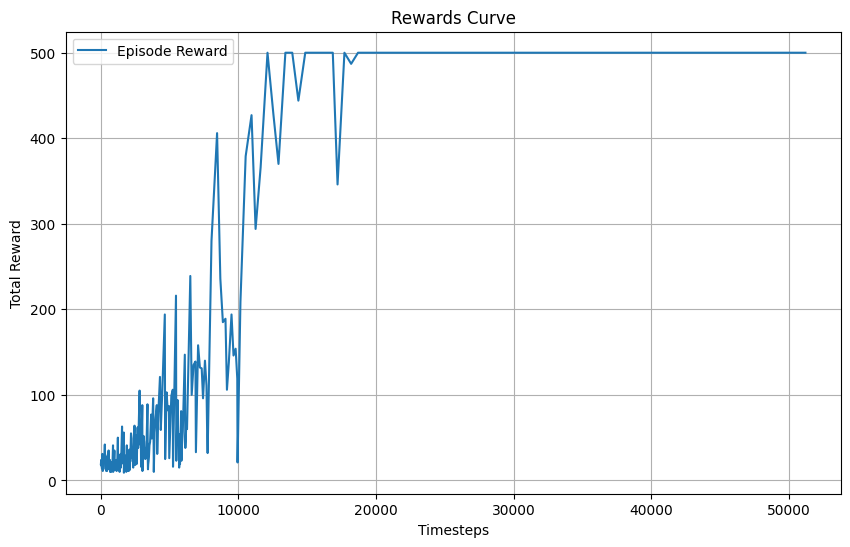

In [11]:
# Load results
x, y = ts2xy(load_results(LOG_DIR), "timesteps")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Total Reward")
plt.title("Rewards Curve")
plt.legend()
plt.grid()
plt.show()

## 4. Play Cart-pole with Trained Policy and Display it in Jupyter and Colab
Visualize the trained agent interacting with the CartPole environment.

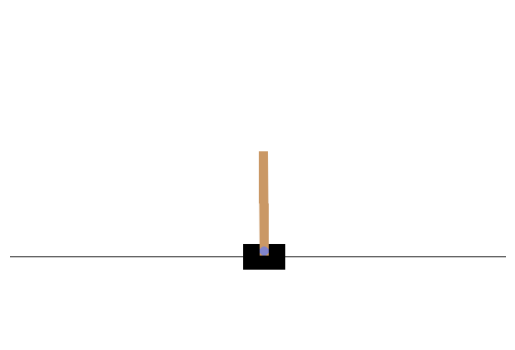

Final Performance: Total Reward = 500.0


In [12]:
# def render_trained_agent(model):
#     """
#     Renders the trained agent interacting with the environment.
#     """
#     env = gym.make('CartPole-v1', render_mode='human')
#     obs, _ = env.reset()
#     done = False
#     truncated = False
#     total_reward = 0

#     while not (done or truncated):
#         env.render()  # Show the GUI
#         action, _ = model.predict(obs)  # Use the trained policy to select an action
#         obs, reward, done, truncated, _ = env.step(action)
#         total_reward += reward

#     env.close()
#     print(f"Total Reward: {total_reward}")

# # Display the trained performance
# render_trained_agent(trained_model)
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Function to visualize Cart-Pole performance
def play_cartpole(model):
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    state, _ = env.reset()
    total_reward = 0
    done = False
    truncated = False
    frames = []  # Store frames for visualization

    while not (done or truncated):
        frame = env.render()
        frames.append(frame)
        action, _ = model.predict(state)  # Use the trained policy to select an action
        state, reward, done, truncated, _ = env.step(action)
        total_reward += reward

    env.close()

    return frames, total_reward

# Function to display animation in Colab
def display_animation(frames):
    for frame in frames:
        clear_output(wait=True)
        plt.imshow(frame)
        plt.axis('off')
        plt.show()

frames, total_reward = play_cartpole(trained_model)
display_animation(frames)
print(f"Final Performance: Total Reward = {total_reward}")